## Springboard Data Science Track Capstone Project 2
### Music Genre Classification from Audio Samples
### by Morgan Fry
### Extended Modeling -- Time Distributed CNN

Since the LSTM model did not perform as well as the CNN model, it may be useful to combine something from the two approaches by wrapping the convolutional layers in a time distributed layer in order to capture the time related aspects of the data.

In [8]:
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

import utils

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

from sklearn.metrics import classification_report

In [9]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

    except RuntimeError as e:
        print(e)
else:
    print('no gpu')

In [10]:
X_train, X_val, X_test, y_train, y_val, y_test, y_labels = utils.load_mfcc()

In [11]:
tf.keras.backend.clear_session()

model = models.Sequential()

model.add(layers.Reshape((968,24,1),input_shape=(X_train.shape[1],)))
model.add(layers.TimeDistributed(layers.Conv1D(32, 3, activation='relu')))
model.add(layers.TimeDistributed(layers.MaxPooling1D(2)))
model.add(layers.TimeDistributed(layers.Conv1D(32, 3, activation='relu')))

model.add(layers.TimeDistributed(layers.Conv1D(32, 3, activation='relu')))
model.add(layers.TimeDistributed(layers.MaxPooling1D(2)))
model.add(layers.TimeDistributed(layers.Flatten()))

model.add(layers.LSTM(units=32, dropout=0.2, return_sequences=False))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(.2))
model.add(layers.Dense(8, activation='softmax'))

loss=tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.0, nesterov=True)
#optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=True)
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 968, 24, 1)        0         
_________________________________________________________________
time_distributed (TimeDistri (None, 968, 22, 32)       128       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 968, 11, 32)       0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 968, 9, 32)        3104      
_________________________________________________________________
time_distributed_3 (TimeDist (None, 968, 7, 32)        3104      
_________________________________________________________________
time_distributed_4 (TimeDist (None, 968, 3, 32)        0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, 968, 96)           0

In [12]:
%%time

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                              min_delta=0.0001,
                                              patience=150,
                                              restore_best_weights=True)

with tf.device('/GPU:0'):
    history=model.fit(X_train,
              y_train,
              epochs=500,
              batch_size=16,
              callbacks=[early_stop],
              validation_data=(X_val, y_val))

Epoch 1/500
395/395 [==============================] - 17s 43ms/step - loss: 2.0785 - accuracy: 0.1271 - val_loss: 2.0754 - val_accuracy: 0.1135
Epoch 2/500
395/395 [==============================] - 17s 42ms/step - loss: 2.0739 - accuracy: 0.1450 - val_loss: 2.0705 - val_accuracy: 0.1791
Epoch 3/500
395/395 [==============================] - 17s 42ms/step - loss: 2.0694 - accuracy: 0.1645 - val_loss: 2.0645 - val_accuracy: 0.1728
Epoch 4/500
395/395 [==============================] - 17s 42ms/step - loss: 2.0639 - accuracy: 0.1661 - val_loss: 2.0575 - val_accuracy: 0.1728
Epoch 5/500
395/395 [==============================] - 17s 42ms/step - loss: 2.0565 - accuracy: 0.1735 - val_loss: 2.0493 - val_accuracy: 0.1866
Epoch 6/500
395/395 [==============================] - 17s 42ms/step - loss: 2.0501 - accuracy: 0.1731 - val_loss: 2.0410 - val_accuracy: 0.1740
Epoch 7/500
395/395 [==============================] - 17s 42ms/step - loss: 2.0435 - accuracy: 0.1772 - val_loss: 2.0339 - val_ac

395/395 [==============================] - 18s 46ms/step - loss: 1.9700 - accuracy: 0.2206 - val_loss: 1.9963 - val_accuracy: 0.1955
Epoch 58/500
395/395 [==============================] - 19s 49ms/step - loss: 1.9444 - accuracy: 0.2261 - val_loss: 1.8778 - val_accuracy: 0.2787
Epoch 59/500
395/395 [==============================] - 19s 48ms/step - loss: 1.9974 - accuracy: 0.2082 - val_loss: 2.0312 - val_accuracy: 0.1854
Epoch 60/500
395/395 [==============================] - 19s 47ms/step - loss: 2.0154 - accuracy: 0.1921 - val_loss: 1.9585 - val_accuracy: 0.2459
Epoch 61/500
395/395 [==============================] - 18s 47ms/step - loss: 2.0114 - accuracy: 0.1897 - val_loss: 1.9470 - val_accuracy: 0.2472
Epoch 62/500
395/395 [==============================] - 19s 48ms/step - loss: 1.9687 - accuracy: 0.2158 - val_loss: 1.9202 - val_accuracy: 0.2472
Epoch 63/500
395/395 [==============================] - 19s 49ms/step - loss: 2.0483 - accuracy: 0.1883 - val_loss: 2.0571 - val_accuracy

395/395 [==============================] - 18s 47ms/step - loss: 1.9679 - accuracy: 0.2171 - val_loss: 1.9399 - val_accuracy: 0.2535
Epoch 114/500
395/395 [==============================] - 19s 47ms/step - loss: 1.9509 - accuracy: 0.2320 - val_loss: 1.9399 - val_accuracy: 0.2333
Epoch 115/500
395/395 [==============================] - 19s 49ms/step - loss: 1.9646 - accuracy: 0.2119 - val_loss: 1.9697 - val_accuracy: 0.2119
Epoch 116/500
395/395 [==============================] - 19s 49ms/step - loss: 1.9596 - accuracy: 0.2120 - val_loss: 1.9520 - val_accuracy: 0.2055
Epoch 117/500
395/395 [==============================] - 19s 49ms/step - loss: 1.9597 - accuracy: 0.2190 - val_loss: 1.9192 - val_accuracy: 0.2371
Epoch 118/500
395/395 [==============================] - 19s 49ms/step - loss: 1.9776 - accuracy: 0.2070 - val_loss: 1.9478 - val_accuracy: 0.2396
Epoch 119/500
395/395 [==============================] - 20s 50ms/step - loss: 1.9569 - accuracy: 0.2098 - val_loss: 1.9554 - val_ac

Epoch 169/500
395/395 [==============================] - 19s 49ms/step - loss: 1.8369 - accuracy: 0.2784 - val_loss: 1.7948 - val_accuracy: 0.3140
Epoch 170/500
395/395 [==============================] - 19s 49ms/step - loss: 1.8370 - accuracy: 0.2772 - val_loss: 1.7992 - val_accuracy: 0.3178
Epoch 171/500
395/395 [==============================] - 19s 49ms/step - loss: 1.8191 - accuracy: 0.2875 - val_loss: 1.7869 - val_accuracy: 0.3228
Epoch 172/500
395/395 [==============================] - 21s 53ms/step - loss: 1.8191 - accuracy: 0.2887 - val_loss: 1.7908 - val_accuracy: 0.3014
Epoch 173/500
395/395 [==============================] - 18s 47ms/step - loss: 1.8199 - accuracy: 0.2878 - val_loss: 1.7719 - val_accuracy: 0.3329
Epoch 174/500
395/395 [==============================] - 18s 47ms/step - loss: 1.8130 - accuracy: 0.2929 - val_loss: 1.8203 - val_accuracy: 0.3052
Epoch 175/500
395/395 [==============================] - 18s 47ms/step - loss: 1.8092 - accuracy: 0.3008 - val_loss: 1

Epoch 225/500
395/395 [==============================] - 17s 43ms/step - loss: 1.7498 - accuracy: 0.3257 - val_loss: 1.7168 - val_accuracy: 0.3480
Epoch 226/500
395/395 [==============================] - 19s 48ms/step - loss: 1.7442 - accuracy: 0.3301 - val_loss: 1.6986 - val_accuracy: 0.3417
Epoch 227/500
395/395 [==============================] - 20s 51ms/step - loss: 1.7465 - accuracy: 0.3301 - val_loss: 1.7155 - val_accuracy: 0.3443
Epoch 228/500
395/395 [==============================] - 18s 45ms/step - loss: 1.7435 - accuracy: 0.3312 - val_loss: 1.7042 - val_accuracy: 0.3468
Epoch 229/500
395/395 [==============================] - 18s 47ms/step - loss: 1.7408 - accuracy: 0.3223 - val_loss: 1.7340 - val_accuracy: 0.3153
Epoch 230/500
395/395 [==============================] - 17s 44ms/step - loss: 1.7418 - accuracy: 0.3216 - val_loss: 1.6895 - val_accuracy: 0.3607
Epoch 231/500
395/395 [==============================] - 17s 43ms/step - loss: 1.7298 - accuracy: 0.3338 - val_loss: 1

Epoch 281/500
395/395 [==============================] - 18s 46ms/step - loss: 1.6568 - accuracy: 0.3813 - val_loss: 1.6360 - val_accuracy: 0.4035
Epoch 282/500
395/395 [==============================] - 18s 46ms/step - loss: 1.6570 - accuracy: 0.3846 - val_loss: 1.6270 - val_accuracy: 0.4124
Epoch 283/500
395/395 [==============================] - 18s 46ms/step - loss: 1.6484 - accuracy: 0.3830 - val_loss: 1.6367 - val_accuracy: 0.3985
Epoch 284/500
395/395 [==============================] - 18s 46ms/step - loss: 1.6505 - accuracy: 0.3759 - val_loss: 1.6214 - val_accuracy: 0.4212
Epoch 285/500
395/395 [==============================] - 18s 45ms/step - loss: 1.6513 - accuracy: 0.3784 - val_loss: 1.6295 - val_accuracy: 0.3960
Epoch 286/500
395/395 [==============================] - 18s 46ms/step - loss: 1.6533 - accuracy: 0.3777 - val_loss: 1.6214 - val_accuracy: 0.4136
Epoch 287/500
395/395 [==============================] - 18s 46ms/step - loss: 1.6487 - accuracy: 0.3842 - val_loss: 1

Epoch 337/500
395/395 [==============================] - 18s 45ms/step - loss: 1.6084 - accuracy: 0.4029 - val_loss: 1.6025 - val_accuracy: 0.3985
Epoch 338/500
395/395 [==============================] - 18s 45ms/step - loss: 1.6197 - accuracy: 0.3971 - val_loss: 1.5900 - val_accuracy: 0.3997
Epoch 339/500
395/395 [==============================] - 17s 44ms/step - loss: 1.6002 - accuracy: 0.4055 - val_loss: 1.5726 - val_accuracy: 0.3997
Epoch 340/500
395/395 [==============================] - 18s 44ms/step - loss: 1.6059 - accuracy: 0.4027 - val_loss: 1.6226 - val_accuracy: 0.3884
Epoch 341/500
395/395 [==============================] - 18s 45ms/step - loss: 1.6045 - accuracy: 0.4035 - val_loss: 1.5560 - val_accuracy: 0.4187
Epoch 342/500
395/395 [==============================] - 17s 44ms/step - loss: 1.5982 - accuracy: 0.4036 - val_loss: 1.5718 - val_accuracy: 0.4124
Epoch 343/500
395/395 [==============================] - 17s 44ms/step - loss: 1.5989 - accuracy: 0.3975 - val_loss: 1

Epoch 393/500
395/395 [==============================] - 20s 50ms/step - loss: 1.5607 - accuracy: 0.4228 - val_loss: 1.5521 - val_accuracy: 0.4136
Epoch 394/500
395/395 [==============================] - 19s 47ms/step - loss: 1.5506 - accuracy: 0.4285 - val_loss: 1.5494 - val_accuracy: 0.4199
Epoch 395/500
395/395 [==============================] - 20s 51ms/step - loss: 1.5592 - accuracy: 0.4239 - val_loss: 1.5983 - val_accuracy: 0.3972
Epoch 396/500
395/395 [==============================] - 19s 47ms/step - loss: 1.5694 - accuracy: 0.4254 - val_loss: 1.5702 - val_accuracy: 0.4061
Epoch 397/500
395/395 [==============================] - 19s 47ms/step - loss: 1.5543 - accuracy: 0.4260 - val_loss: 1.5576 - val_accuracy: 0.4174
Epoch 398/500
395/395 [==============================] - 19s 48ms/step - loss: 1.5653 - accuracy: 0.4269 - val_loss: 1.5580 - val_accuracy: 0.4187
Epoch 399/500
395/395 [==============================] - 19s 48ms/step - loss: 1.5557 - accuracy: 0.4319 - val_loss: 1

Epoch 449/500
395/395 [==============================] - 17s 43ms/step - loss: 1.5227 - accuracy: 0.4490 - val_loss: 1.5108 - val_accuracy: 0.4300
Epoch 450/500
395/395 [==============================] - 17s 43ms/step - loss: 1.5195 - accuracy: 0.4463 - val_loss: 1.5392 - val_accuracy: 0.4363
Epoch 451/500
395/395 [==============================] - 17s 43ms/step - loss: 1.5158 - accuracy: 0.4544 - val_loss: 1.5088 - val_accuracy: 0.4489
Epoch 452/500
395/395 [==============================] - 17s 43ms/step - loss: 1.5108 - accuracy: 0.4496 - val_loss: 1.5231 - val_accuracy: 0.4414
Epoch 453/500
395/395 [==============================] - 17s 43ms/step - loss: 1.5171 - accuracy: 0.4479 - val_loss: 1.4963 - val_accuracy: 0.4464
Epoch 454/500
395/395 [==============================] - 17s 43ms/step - loss: 1.5098 - accuracy: 0.4498 - val_loss: 1.5800 - val_accuracy: 0.3985
Epoch 455/500
395/395 [==============================] - 17s 43ms/step - loss: 1.5147 - accuracy: 0.4469 - val_loss: 1

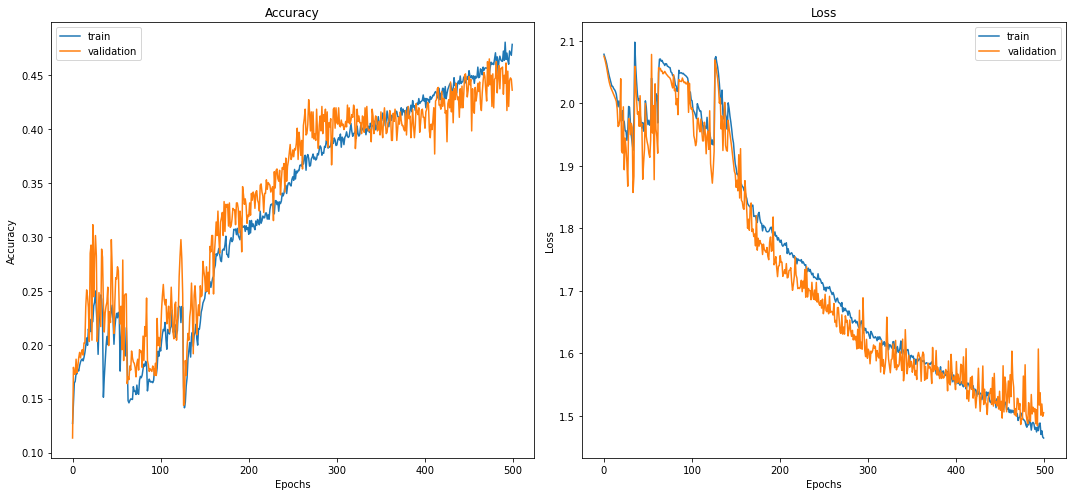

In [15]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

We can see that the validation and training set results diverge when the model achieves about 45% accuracy over the validation set, just as with the CNN model.

In [16]:
y_pred=np.argmax(model.predict(X_test), axis=-1)
print('Classification Report (test set)')
print(classification_report(y_test,y_pred))

Classification Report (test set)
              precision    recall  f1-score   support

           0       0.48      0.26      0.34        96
           1       0.41      0.16      0.23        98
           2       0.24      0.41      0.30       100
           3       0.47      0.74      0.57       100
           4       0.37      0.20      0.26       100
           5       0.38      0.42      0.40       100
           6       0.27      0.26      0.27       100
           7       0.48      0.53      0.50       100

    accuracy                           0.37       794
   macro avg       0.39      0.37      0.36       794
weighted avg       0.39      0.37      0.36       794





The Time Dependent CNN model shows a modest improvement over the LSTM model, but the CNN model still performs better in terms of both accuracy and time.

| Model | Accuracy(all classes) | Train Time |
| --- | --- | --- |
| Baseline | .30 | 5m |
| CNN | .39 | 3m |
| LSTM | .34 | 90m |
| TD-CNN | .37 | 2h 30m |


In [4]:
unique_labels=np.unique(y_labels)
unique_ytest=np.unique(y_test)

In [7]:
for i in range(8):
    print(unique_ytest[i],": ",unique_labels[i])

0 :  Electronic
1 :  Experimental
2 :  Folk
3 :  Hip-Hop
4 :  Instrumental
5 :  International
6 :  Pop
7 :  Rock


If we look at which genres of music the models are better and worse at classifying we can infer a few things about why the models' accuracy varies as it does.

| Class | Genre | F1 (CNN) | F1(LSTM) | F1(TD-CNN) |
| --- | --- | --- | --- | --- |
| 0 | Electronic | .45 | .35 | .34 |
| 1 | Experimental | .18 | .21 | .23 |
| 2 | Folk | .19 | .23 | .30 |
| 3 | Hip-Hop | .66 | .56 | .57 |
| 4 | Instrumental | .33 | .33 | .26 |
| 5 | International | .44 | .32 | .40 |
| 6 | Pop | .22 | .29 | .27 |
| 7 | Rock | .52 | .43 | .50 |

All of the models have an easier time with Hip-Hop and Rock than the other genres. I had expected Instrumental to be easy to classify, as it is defined by a lack of a vocalist, which is easy for a human to notice.

The relative lack of success in some genres might be explained by characteristics of the music. For instance, Experimental covers a wide variety of sounds, International contains a number of different sounding sub-genres.  

Perhaps using a larger dataset for training will yield better results  